In [1]:
import os
from PIL import Image
import numpy as np
import shutil
base_folder = r"C:\Users\Sigma\Downloads\ttts\archive\test_data"
cats_folder = os.path.join(base_folder, r"C:\Users\Sigma\Downloads\ttts\archive\test_data\cats")
dogs_folder = os.path.join(base_folder, r"C:\Users\Sigma\Downloads\ttts\archive\test_data\dogs")
output_folder = r"C:\Users\Sigma\Downloads\ttts\after processing2"
output_cats_folder = os.path.join(output_folder, r"C:\Users\Sigma\Downloads\ttts\after processing2\catsss2")
output_dogs_folder = os.path.join(output_folder, r"C:\Users\Sigma\Downloads\ttts\after processing2\dogsss2")
os.makedirs(output_cats_folder, exist_ok=True)
os.makedirs(output_dogs_folder, exist_ok=True)
target_size = (299, 299)
def process_and_save_images(input_folder, output_folder):
    for filename in os.listdir(input_folder):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg','.webp')):
            image_path = os.path.join(input_folder, filename)
            with Image.open(image_path) as img:
                img = img.resize(target_size)
                img_array = np.array(img) / 255.0

                processed_img = Image.fromarray((img_array * 255).astype(np.uint8))
                processed_img.save(os.path.join(output_folder, filename))
process_and_save_images(cats_folder, output_cats_folder)
process_and_save_images(dogs_folder, output_dogs_folder)
print("تمت معالجة الصور وحفظها في المجلدات الجديدة.")

تمت معالجة الصور وحفظها في المجلدات الجديدة.


In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import numpy as np
from PIL import Image
processed_cats_folder = r"C:\Users\Sigma\Downloads\ttts\after processing2\catsss2"
processed_dogs_folder = r"C:\Users\Sigma\Downloads\ttts\after processing2\dogsss2"
augmented_cats_folder = r"C:\Users\Sigma\Downloads\ttts\after processing2\catsss2"
augmented_dogs_folder = r"C:\Users\Sigma\Downloads\ttts\after processing2\dogsss2"
os.makedirs(augmented_cats_folder, exist_ok=True)
os.makedirs(augmented_dogs_folder, exist_ok=True)
def augment_images(input_folder, output_folder, num_augmented_images=8):
  datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)


  for filename in os.listdir(input_folder):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.webp')):
            image_path = os.path.join(input_folder, filename)
            img = Image.open(image_path)
            img = img.resize((299, 299))
            img = img.convert("RGB")
            img_array = np.array(img)

            img_array = np.expand_dims(img_array, axis=0)
            i = 0
            for batch in datagen.flow(img_array, batch_size=1, save_to_dir=output_folder, save_prefix="aug", save_format="jpeg"):
                i += 1
                if i >= num_augmented_images:
                    break
augment_images(processed_cats_folder, augmented_cats_folder)
augment_images(processed_dogs_folder, augmented_dogs_folder)

print("تم إنشاء صور Augmentation جديدة!")


تم إنشاء صور Augmentation جديدة!


In [3]:
import os
processed_cats_folder = r"C:\Users\Sigma\Downloads\ttts\after processing2\catsss2"
processed_dogs_folder = r"C:\Users\Sigma\Downloads\ttts\after processing2\dogsss2"
num_cats = len([f for f in os.listdir(processed_cats_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.webp'))])
num_dogs = len([f for f in os.listdir(processed_dogs_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.webp'))])
print(f"عدد الصور في فئة القطط: {num_cats}")
print(f"عدد الصور في فئة الكلاب: {num_dogs}")

عدد الصور في فئة القطط: 5860
عدد الصور في فئة الكلاب: 5922


In [4]:
def analyze_image_dimensions(folder):
    dimensions = []
    for img_name in os.listdir(folder):
        if img_name.lower().endswith(('.png', '.jpg', '.jpeg', '.webp')):
            img_path = os.path.join(folder, img_name)
            img = Image.open(img_path)
            dimensions.append(img.size)
    return dimensions
cat_dimensions = analyze_image_dimensions(processed_cats_folder)
dog_dimensions = analyze_image_dimensions(processed_dogs_folder)
print("أبعاد صور القطط: ", set(cat_dimensions))
print("أبعاد صور الكلاب: ", set(dog_dimensions))

أبعاد صور القطط:  {(224, 224)}
أبعاد صور الكلاب:  {(224, 224)}


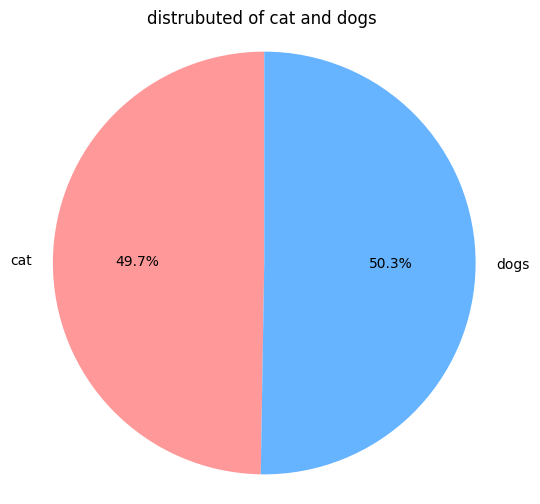

In [5]:
import matplotlib.pyplot as plt
labels = ['cat', 'dogs']
sizes = [num_cats, num_dogs]
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
plt.axis('equal')  # لضمان أن الدائرة ستكون دائرية
plt.title('distrubuted of cat and dogs ')
plt.show()

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
data_dir = r"C:\Users\Sigma\Downloads\ttts\after processing2"
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)  # إعادة قياس الصور وقسم البيانات
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(299, 299),
    batch_size=32,
    class_mode='binary',
    subset='training'
)
validation_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(299, 299),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

Found 9425 images belonging to 2 classes.
Found 2356 images belonging to 2 classes.


In [7]:
import numpy as np
X_train, y_train = [], []
for i in range(len(train_generator)):
    X_batch, y_batch = train_generator[i]
    X_train.extend(X_batch)
    y_train.extend(y_batch)
X_train = np.array(X_train)
y_train = np.array(y_train)
X_val, y_val = [], []
for i in range(len(validation_generator)):
    X_batch, y_batch = validation_generator[i]
    X_val.extend(X_batch)
    y_val.extend(y_batch)
X_val = np.array(X_val)
y_val = np.array(y_val)

In [8]:
!pip install scikeras
from keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.layers import Dense, Dropout
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

In [9]:

X_train_flattened = X_train.reshape(X_train.shape[0], -1)
X_test_flattened = X_val.reshape(X_val.shape[0], -1)


## VGG16

In [15]:

from glob import glob
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from itertools import chain
from datetime import datetime
import statistics
from tqdm import tqdm
import tensorflow as tf
# DenseNet Dependencies
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.activations import sigmoid
from tensorflow.keras.layers import Dense,Conv2D, Flatten, Dropout, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.metrics import Accuracy, Precision, Recall, AUC, BinaryAccuracy, FalsePositives, FalseNegatives, TruePositives, TrueNegatives
from tensorflow.keras.callbacks import CSVLogger, ModelCheckpoint
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.applications import DenseNet121, DenseNet169, DenseNet201, VGG16, ResNet50
from keras import backend as K
from tensorflow.keras import Sequential
import keras
import matplotlib
from sklearn.metrics import roc_curve, auc, roc_auc_score
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, LearningRateScheduler
from sklearn.metrics import roc_curve, auc

In [31]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau


IMG_SHAPE = (224, 224, 3)


OPTIMIZER = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

# تحميل نموذج VGG16 مع تحديد أبعاد الإدخال
base_model = tf.keras.applications.VGG16(input_shape=IMG_SHAPE, include_top=False, weights='imagenet')

# تجميد أول 100 طبقة
for layer in base_model.layers[:100]:
    layer.trainable = False

# بناء الرأس الجديد للنموذج
x = base_model.output
x = GlobalAveragePooling2D()(x)
predictions = Dense(1, activation='sigmoid', name='Final')(x)
model = Model(inputs=base_model.input, outputs=predictions)

# تجميع النموذج
model.compile(
    loss='binary_crossentropy',
    optimizer=OPTIMIZER,
    metrics=[
        'accuracy',
        tf.keras.metrics.Precision(),
        tf.keras.metrics.Recall(),
        tf.keras.metrics.SpecificityAtSensitivity(0.5),
        tf.keras.metrics.SensitivityAtSpecificity(0.5)
    ]
)

In [33]:
def get_callbacks(model_name):
    # حفظ أفضل نموذج بناءً على val_loss
    checkpoint = ModelCheckpoint(
        filepath=f'model.{model_name}.keras',  # استخدم الامتداد .keras
        monitor='val_loss',
        mode='min',
        save_best_only=True,
        verbose=1
    )
    
    # إيقاف التدريب مبكرًا إذا لم يتحسن val_loss
    early_stop = EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True,
        verbose=1
    )
    
    # تقليل معدل التعلم عند توقف التحسن
    reduce_lr = ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=5,
        verbose=1,
        min_lr=1e-6,
        min_delta=0.00001,
        mode='auto'
    )
    
    return [checkpoint, early_stop, reduce_lr]

callbacks = get_callbacks('dense121')

# تدريب النموذج باستخدام المولدات مباشرة
history = model.fit(
    train_generator,
    epochs=12,
    validation_data=validation_generator,
    callbacks=callbacks
)

Epoch 1/12
294/294 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8523 - loss: 0.5028 - precision_1: 0.8645 - recall_1: 0.8305 - sensitivity_at_specificity_1: 0.9670 - specificity_at_sensitivity_1: 0.9756
Epoch 1: val_loss improved from inf to 0.42886, saving model to model.dense121.keras
294/294 ━━━━━━━━━━━━━━━━━━━━ 905s 3s/step - accuracy: 0.8523 - loss: 0.5028 - precision_1: 0.8645 - recall_1: 0.8305 - sensitivity_at_specificity_1: 0.9670 - specificity_at_sensitivity_1: 0.9757 - val_accuracy: 0.8582 - val_loss: 0.4289 - val_precision_1: 0.8455 - val_recall_1: 0.8765 - val_sensitivity_at_specificity_1: 0.9889 - val_specificity_at_sensitivity_1: 0.9779 - learning_rate: 0.0010
Epoch 2/12
294/294 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8662 - loss: 0.4305 - precision_1: 0.8726 - recall_1: 0.8603 - sensitivity_at_specificity_1: 0.9786 - specificity_at_sensitivity_1: 0.9779
Epoch 2: val_loss improved from 0.42886 to 0.38201, saving model to model.dense121.keras
294/294 ━━━━━━━━━━━━━━

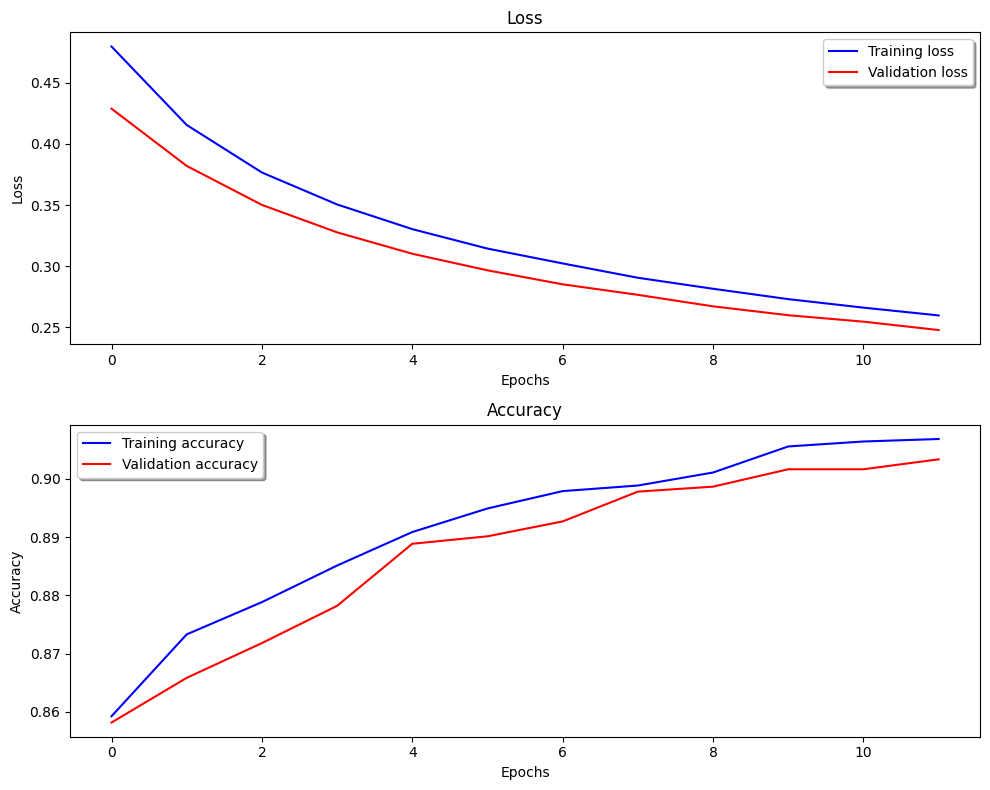

In [34]:
fig, ax = plt.subplots(2, 1, figsize=(10, 8))
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="Validation loss")
ax[0].set_title("Loss")
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Loss")
ax[0].legend(loc='best', shadow=True)


ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r', label="Validation accuracy")
ax[1].set_title("Accuracy")
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Accuracy")
ax[1].legend(loc='best', shadow=True)

plt.tight_layout()
plt.show()

In [36]:
from sklearn.metrics import classification_report

y_pred = (model.predict(X_val) > 0.5).astype("int32")
print('Classification Report:\n', classification_report(y_val, y_pred))

74/74 ━━━━━━━━━━━━━━━━━━━━ 180s 2s/step
Classification Report:
               precision    recall  f1-score   support

         0.0       0.90      0.90      0.90      1174
         1.0       0.90      0.90      0.90      1174

    accuracy                           0.90      2348
   macro avg       0.90      0.90      0.90      2348
weighted avg       0.90      0.90      0.90      2348



1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


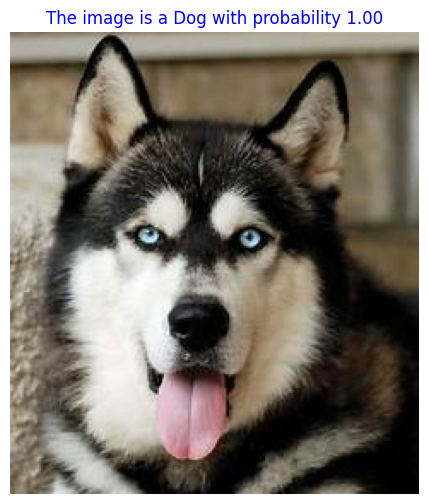

In [12]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

model_path = r"C:\Users\Sigma\Downloads\model.dense121.keras"
model = load_model(model_path)
image_path = r"C:\Users\Sigma\Downloads\OIP (8).jpg"
img = load_img(image_path, target_size=(224, 224))
img_array = img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0

prediction = model.predict(img_array)
if prediction[0][0] > 0.5:
    label = f"The image is a Dog with probability {prediction[0][0]:.2f}"
else:
    label = f"The image is a Cat with probability {1 - prediction[0][0]:.2f}"
plt.figure(figsize=(6, 6))
plt.imshow(load_img(image_path))
plt.title(label, fontsize=12, color="blue")
plt.axis('off')
plt.show()

In [38]:
print(len(model.layers))

21


In [39]:
print(model.summary())

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Final (Dense)                   │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,716,229 (56.14 MB)

 Trainable params: 513 (2.00 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

 Optimizer params: 1,028 (4.02 KB)

None


## Dense

In [40]:
OPTIMIZER =Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

base_model = tf.keras.applications.DenseNet121(input_shape=IMG_SHAPE,include_top=False,weights='imagenet')
for layer in base_model.layers[351:]:
  layer.trainable = True
x = base_model.output    
x = GlobalAveragePooling2D()(x)
predictions = Dense(1, activation='sigmoid',name='Final')(x)
model = Model(inputs=base_model.input, outputs=predictions)
model.compile(loss ='binary_crossentropy',optimizer=OPTIMIZER,metrics=['accuracy',keras.metrics.Precision(), keras.metrics.Recall(), keras.metrics.SpecificityAtSensitivity(0.5), keras.metrics.SensitivityAtSpecificity(0.5)])

In [41]:
def get_callbacks(model_name):
    
    checkpoint = ModelCheckpoint(
        filepath=f'model.{model_name}.keras',  
        monitor='val_loss',
        mode='min',
        save_best_only=True,
        verbose=1
    )
    
    
    early_stop = EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True,
        verbose=1
    )
    
   
    reduce_lr = ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=5,
        verbose=1,
        min_lr=1e-6,
        min_delta=0.00001,
        mode='auto'
    )
    
    return [checkpoint, early_stop, reduce_lr]

callbacks = get_callbacks('dense121')

history = model.fit(
    train_generator,
    epochs=12,
    validation_data=validation_generator,
    callbacks=callbacks
)

Epoch 1/12
294/294 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.8917 - loss: 0.2594 - precision_2: 0.8850 - recall_2: 0.9044 - sensitivity_at_specificity_2: 0.9902 - specificity_at_sensitivity_2: 0.9872
Epoch 1: val_loss improved from inf to 0.23411, saving model to model.dense121.keras
294/294 ━━━━━━━━━━━━━━━━━━━━ 2026s 7s/step - accuracy: 0.8918 - loss: 0.2592 - precision_2: 0.8851 - recall_2: 0.9045 - sensitivity_at_specificity_2: 0.9902 - specificity_at_sensitivity_2: 0.9872 - val_accuracy: 0.9182 - val_loss: 0.2341 - val_precision_2: 0.9842 - val_recall_2: 0.8501 - val_sensitivity_at_specificity_2: 0.9864 - val_specificity_at_sensitivity_2: 0.9991 - learning_rate: 0.0010
Epoch 2/12
294/294 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.9630 - loss: 0.0906 - precision_2: 0.9609 - recall_2: 0.9652 - sensitivity_at_specificity_2: 0.9998 - specificity_at_sensitivity_2: 0.9993
Epoch 2: val_loss did not improve from 0.23411
294/294 ━━━━━━━━━━━━━━━━━━━━ 1818s 6s/step - accuracy: 0.9630 -

In [42]:
from sklearn.metrics import classification_report

y_pred = (model.predict(X_val) > 0.5).astype("int32")
print('Classification Report:\n', classification_report(y_val, y_pred))

74/74 ━━━━━━━━━━━━━━━━━━━━ 101s 1s/step
Classification Report:
               precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      1174
         1.0       1.00      0.97      0.99      1174

    accuracy                           0.99      2348
   macro avg       0.99      0.99      0.99      2348
weighted avg       0.99      0.99      0.99      2348



In [43]:
print(len(model.layers))

429


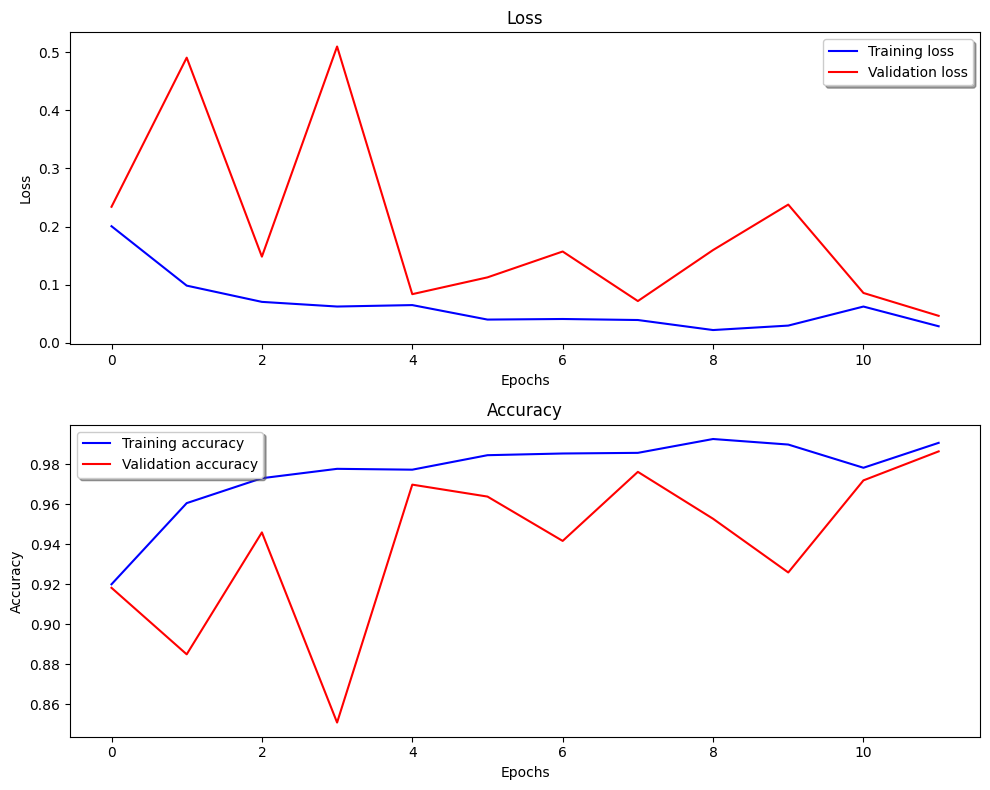

In [44]:
fig, ax = plt.subplots(2, 1, figsize=(10, 8))
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="Validation loss")
ax[0].set_title("Loss")
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Loss")
ax[0].legend(loc='best', shadow=True)


ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r', label="Validation accuracy")
ax[1].set_title("Accuracy")
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Accuracy")
ax[1].legend(loc='best', shadow=True)

plt.tight_layout()
plt.show()

In [45]:
print(model.summary())

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d      │ (None, 230, 230,  │          0 │ input_layer_2[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,408 │ zero_padding2d[0… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_1    │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1               │ (None, 56, 56,    │          0 │ zero_padding2d_1… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │        256 │ pool1[0][0]       │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_relu │ (None, 56, 56,    │          0 │ conv2_block1_0_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      8,192 │ conv2_block1_0_r… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        512 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,864 │ conv2_block1_1_r… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_concat │ (None, 56, 56,    │          0 │ pool1[0][0],      │
│ (Concatenate)       │ 96)               │            │ conv2_block1_2_c… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_bn   │ (None, 56, 56,    │        384 │ conv2_block1_con… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_relu │ (None, 56, 56,    │          0 │ conv2_block2_0_b… │
│ (Activation)        │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_1_conv │ (None, 56, 56,    │     12,288 │ conv2_block2_0_r

 Total params: 20,948,293 (79.91 MB)

 Trainable params: 6,954,881 (26.53 MB)

 Non-trainable params: 83,648 (326.75 KB)

 Optimizer params: 13,909,764 (53.06 MB)

None


1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


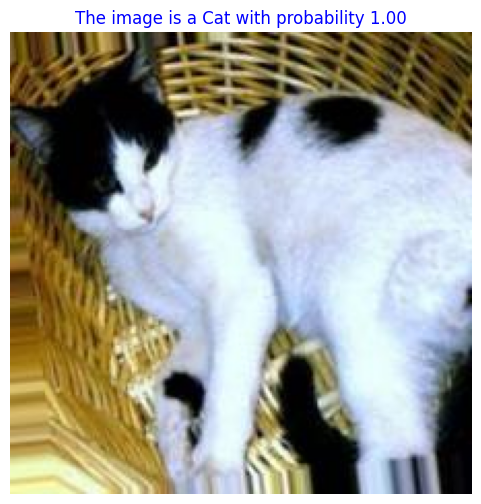

In [11]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

model_path = r"C:\Users\Sigma\Downloads\model.dense121.keras"
model = load_model(model_path)
image_path = r"C:\Users\Sigma\Downloads\ttts\after processing2\catsss2\aug_0_4103.jpeg"
img = load_img(image_path, target_size=(224, 224))
img_array = img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0

prediction = model.predict(img_array)
if prediction[0][0] > 0.5:
    label = f"The image is a Dog with probability {prediction[0][0]:.2f}"
else:
    label = f"The image is a Cat with probability {1 - prediction[0][0]:.2f}"
plt.figure(figsize=(6, 6))
plt.imshow(load_img(image_path))
plt.title(label, fontsize=12, color="blue")
plt.axis('off')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


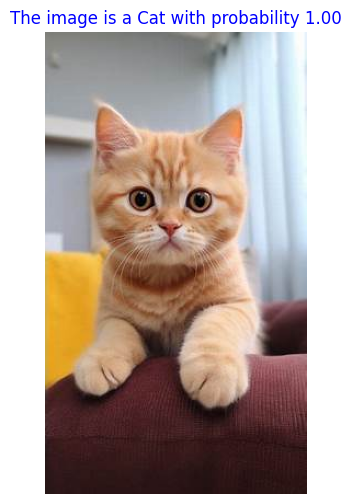

In [13]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

model_path = r"C:\Users\Sigma\Downloads\model.dense121.keras"
model = load_model(model_path)
image_path = r"C:\Users\Sigma\Downloads\OIP (5).jpg"
img = load_img(image_path, target_size=(224, 224))
img_array = img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0

prediction = model.predict(img_array)
if prediction[0][0] > 0.5:
    label = f"The image is a Dog with probability {prediction[0][0]:.2f}"
else:
    label = f"The image is a Cat with probability {1 - prediction[0][0]:.2f}"
plt.figure(figsize=(6, 6))
plt.imshow(load_img(image_path))
plt.title(label, fontsize=12, color="blue")
plt.axis('off')
plt.show()

# ResNet50

In [17]:
IMG_SHAPE = (224, 224, 3)

OPTIMIZER =Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
base_model = tf.keras.applications.ResNet50(input_shape=IMG_SHAPE,include_top=False,weights='imagenet')
for layer in base_model.layers[100:]:
  layer.trainable = True
x = base_model.output
x = GlobalAveragePooling2D()(x)
predictions = Dense(1, activation='sigmoid',name='Final')(x)
model = Model(inputs=base_model.input, outputs=predictions)
#model.load_weights(dire)
model.compile(loss ='binary_crossentropy',optimizer=OPTIMIZER,metrics=['accuracy',keras.metrics.Precision(), keras.metrics.Recall(), keras.metrics.SpecificityAtSensitivity(0.5), keras.metrics.SensitivityAtSpecificity(0.5)])

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 31s 0us/step


In [18]:
def get_callbacks(model_name):
    checkpoint = ModelCheckpoint(
        filepath=f'model.{model_name}.keras',
        monitor='val_loss',
        mode='min',
        save_best_only=True,
        verbose=1
    )

    early_stop = EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True,
        verbose=1
    )
    
    reduce_lr = ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=5,
        verbose=1,
        min_lr=1e-6,
        min_delta=0.00001,
        mode='auto'
    )
    
    return [checkpoint, early_stop, reduce_lr]

callbacks = get_callbacks('dense121')
history = model.fit(
    train_generator,
    epochs=12,
    validation_data=validation_generator,
    callbacks=callbacks
)

Epoch 1/12


C:\Users\Sigma\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


295/295 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.8467 - loss: 0.4109 - precision: 0.8547 - recall: 0.8361 - sensitivity_at_specificity: 0.9654 - specificity_at_sensitivity: 0.9730
Epoch 1: val_loss improved from inf to 0.70248, saving model to model.dense121.keras
295/295 ━━━━━━━━━━━━━━━━━━━━ 1601s 5s/step - accuracy: 0.8468 - loss: 0.4105 - precision: 0.8549 - recall: 0.8363 - sensitivity_at_specificity: 0.9655 - specificity_at_sensitivity: 0.9731 - val_accuracy: 0.5025 - val_loss: 0.7025 - val_precision: 0.5025 - val_recall: 1.0000 - val_sensitivity_at_specificity: 0.0372 - val_specificity_at_sensitivity: 0.2611 - learning_rate: 0.0010
Epoch 2/12
295/295 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.9386 - loss: 0.1530 - precision: 0.9399 - recall: 0.9399 - sensitivity_at_specificity: 0.9996 - specificity_at_sensitivity: 0.9982
Epoch 2: val_loss did not improve from 0.70248
295/295 ━━━━━━━━━━━━━━━━━━━━ 1533s 5s/step - accuracy: 0.9386 - loss: 0.1530 - precision: 0.9399 - recall:

In [19]:
from sklearn.metrics import classification_report

y_pred = (model.predict(X_val) > 0.5).astype("int32")
print('Classification Report:\n', classification_report(y_val, y_pred))

74/74 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step
Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      0.99      0.98      1172
         1.0       0.99      0.96      0.98      1184

    accuracy                           0.98      2356
   macro avg       0.98      0.98      0.98      2356
weighted avg       0.98      0.98      0.98      2356



In [20]:
print(model.summary())

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 70,663,045 (269.56 MB)

 Trainable params: 23,536,641 (89.79 MB)

 Non-trainable params: 53,120 (207.50 KB)

 Optimizer params: 47,073,284 (179.57 MB)

None


In [21]:
print(len(model.layers))

177


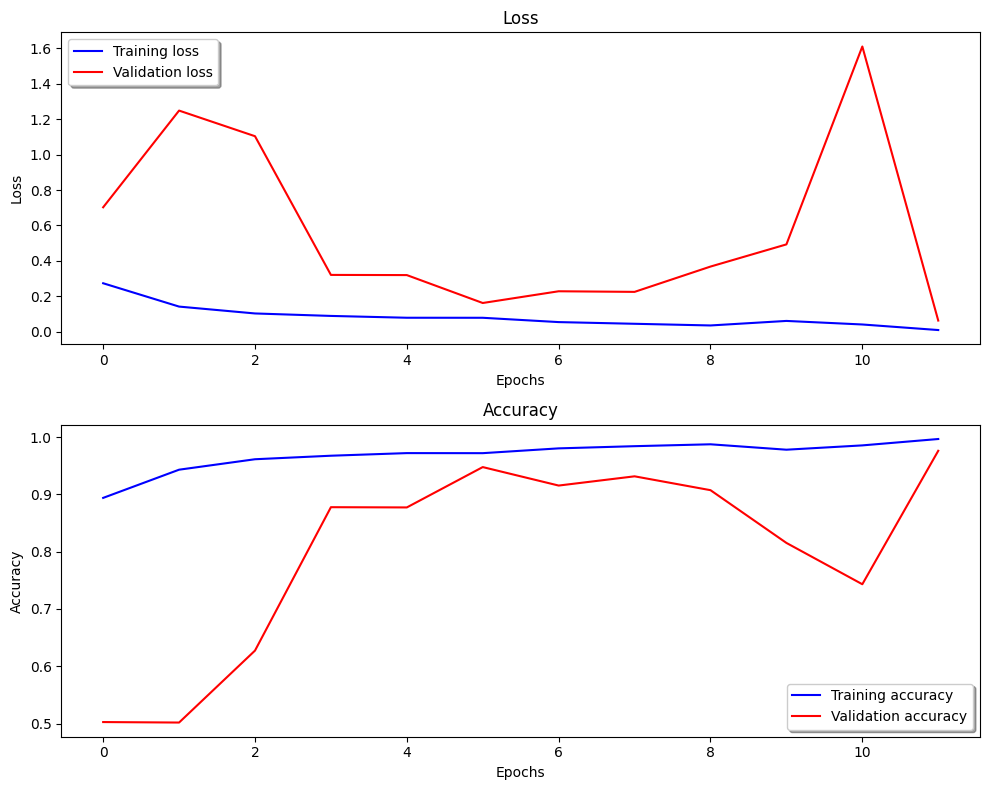

In [22]:
fig, ax = plt.subplots(2, 1, figsize=(10, 8))
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="Validation loss")
ax[0].set_title("Loss")
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Loss")
ax[0].legend(loc='best', shadow=True)


ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r', label="Validation accuracy")
ax[1].set_title("Accuracy")
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Accuracy")
ax[1].legend(loc='best', shadow=True)

plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


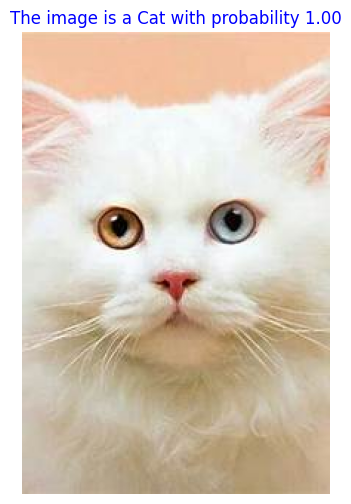

In [24]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

model_path = r"C:\Users\Sigma\Downloads\model.dense121.keras"
model = load_model(model_path)
image_path = r"C:\Users\Sigma\Downloads\OIP (6).jpg"
img = load_img(image_path, target_size=(224, 224))
img_array = img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0

prediction = model.predict(img_array)
if prediction[0][0] > 0.5:
    label = f"The image is a Dog with probability {prediction[0][0]:.2f}"
else:
    label = f"The image is a Cat with probability {1 - prediction[0][0]:.2f}"
plt.figure(figsize=(6, 6))
plt.imshow(load_img(image_path))
plt.title(label, fontsize=12, color="blue")
plt.axis('off')
plt.show()

# MobileNet

In [ ]:
OPTIMIZER =Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
base_model=tf.keras.applications.mobilenet.MobileNet(include_top=False, weights="imagenet",input_shape=IMG_SHAPE)

# Freeze the first 100 layers
for layer in base_model.layers[100:]:
  layer.trainable = True


x = base_model.output
x = GlobalAveragePooling2D()(x)
predictions = Dense(1, activation='sigmoid',name='Final')(x)
model = Model(inputs=base_model.input, outputs=predictions)
#model.load_weights(dire)
model.compile(loss ='binary_crossentropy',optimizer=OPTIMIZER,metrics=['accuracy',keras.metrics.Precision(), keras.metrics.Recall(), keras.metrics.SpecificityAtSensitivity(0.5), keras.metrics.SensitivityAtSpecificity(0.5)])
#model.summary()

In [25]:
def get_callbacks(model_name):
    
    checkpoint = ModelCheckpoint(
        filepath=f'model.{model_name}.keras', 
        monitor='val_loss',
        mode='min',
        save_best_only=True,
        verbose=1
    )
    
    
    early_stop = EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True,
        verbose=1
    )
    
    
    reduce_lr = ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=5,
        verbose=1,
        min_lr=1e-6,
        min_delta=0.00001,
        mode='auto'
    )
    
    return [checkpoint, early_stop, reduce_lr]

callbacks = get_callbacks('mobileNet')

history = model.fit(
    train_generator,
    epochs=6,
    validation_data=validation_generator,
    callbacks=callbacks
)

Epoch 1/6
295/295 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.9992 - loss: 0.0026 - precision: 0.9990 - recall: 0.9996 - sensitivity_at_specificity: 1.0000 - specificity_at_sensitivity: 1.0000
Epoch 1: val_loss improved from inf to 0.03372, saving model to model.mobileNet.keras
295/295 ━━━━━━━━━━━━━━━━━━━━ 1585s 5s/step - accuracy: 0.9992 - loss: 0.0026 - precision: 0.9990 - recall: 0.9996 - sensitivity_at_specificity: 1.0000 - specificity_at_sensitivity: 1.0000 - val_accuracy: 0.9881 - val_loss: 0.0337 - val_precision: 0.9825 - val_recall: 0.9941 - val_sensitivity_at_specificity: 1.0000 - val_specificity_at_sensitivity: 0.9974 - learning_rate: 5.0000e-04
Epoch 2/6
295/295 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.9992 - loss: 0.0017 - precision: 0.9995 - recall: 0.9990 - sensitivity_at_specificity: 1.0000 - specificity_at_sensitivity: 1.0000
Epoch 2: val_loss did not improve from 0.03372
295/295 ━━━━━━━━━━━━━━━━━━━━ 1626s 6s/step - accuracy: 0.9992 - loss: 0.0017 - precision: 0.

In [26]:
from sklearn.metrics import classification_report

y_pred = (model.predict(X_val) > 0.5).astype("int32")
print('Classification Report:\n', classification_report(y_val, y_pred))

74/74 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step
Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      0.98      0.99      1172
         1.0       0.98      0.99      0.99      1184

    accuracy                           0.99      2356
   macro avg       0.99      0.99      0.99      2356
weighted avg       0.99      0.99      0.99      2356



In [27]:
print(model.summary())

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 70,663,045 (269.56 MB)

 Trainable params: 23,536,641 (89.79 MB)

 Non-trainable params: 53,120 (207.50 KB)

 Optimizer params: 47,073,284 (179.57 MB)

None


In [28]:
print(len(model.layers))

177


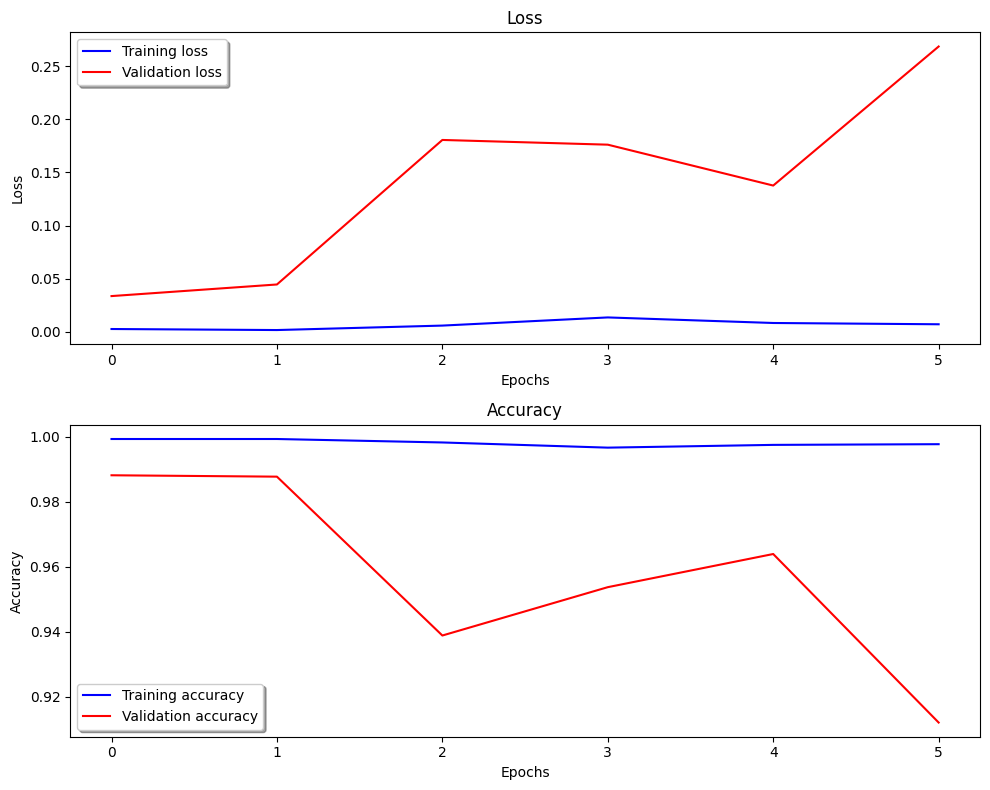

In [29]:
fig, ax = plt.subplots(2, 1, figsize=(10, 8))
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="Validation loss")
ax[0].set_title("Loss")
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Loss")
ax[0].legend(loc='best', shadow=True)


ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r', label="Validation accuracy")
ax[1].set_title("Accuracy")
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Accuracy")
ax[1].legend(loc='best', shadow=True)

plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


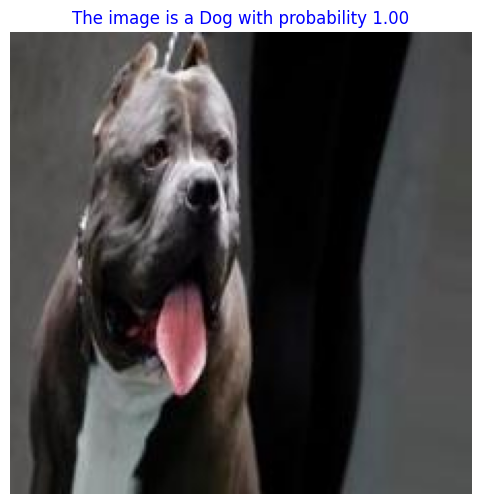

In [30]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

model_path = r"C:\Users\Sigma\Downloads\model.mobileNet.keras"
model = load_model(model_path)
image_path = r"C:\Users\Sigma\Downloads\ttts\after processing2\dogsss2\aug_0_217.jpeg"
img = load_img(image_path, target_size=(224, 224))
img_array = img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0

prediction = model.predict(img_array)
if prediction[0][0] > 0.5:
    label = f"The image is a Dog with probability {prediction[0][0]:.2f}"
else:
    label = f"The image is a Cat with probability {1 - prediction[0][0]:.2f}"
plt.figure(figsize=(6, 6))
plt.imshow(load_img(image_path))
plt.title(label, fontsize=12, color="blue")
plt.axis('off')
plt.show()